<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

## Importing the libraries

In [2]:
#!pip install matplotlib==3.8.0

In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
import xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline

import time

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Load and Prepare Data

In [4]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,88
SibSp,7
Parch,7
Fare,248
Embarked,3


In [9]:
temp_df = df.drop(['Age', 'Fare'], axis=1)

In [10]:
for col in temp_df:

  print(col,':\n\n', temp_df[col].value_counts())

Survived :

 Survived
0    549
1    342
Name: count, dtype: int64
Pclass :

 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex :

 Sex
male      577
female    314
Name: count, dtype: int64
SibSp :

 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch :

 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Embarked :

 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


## Data Preprocessing

In [11]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [12]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df.Embarked.mode().values[0], inplace=True)

In [13]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [14]:
df.groupby(['Sex', 'Survived']).count()

Pclass  Age  SibSp  Parch  Fare  Embarked
Sex    Survived                                           
female 0             81   81     81     81    81        81
       1            233  233    233    233   233       233
male   0            468  468    468    468   468       468
       1            109  109    109    109   109       109

In [15]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


## Strorytelling - Visualization

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
df_dummies = pd.get_dummies(df).astype(float)
df_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [18]:
corr_mat_dummies = df_dummies.corr()

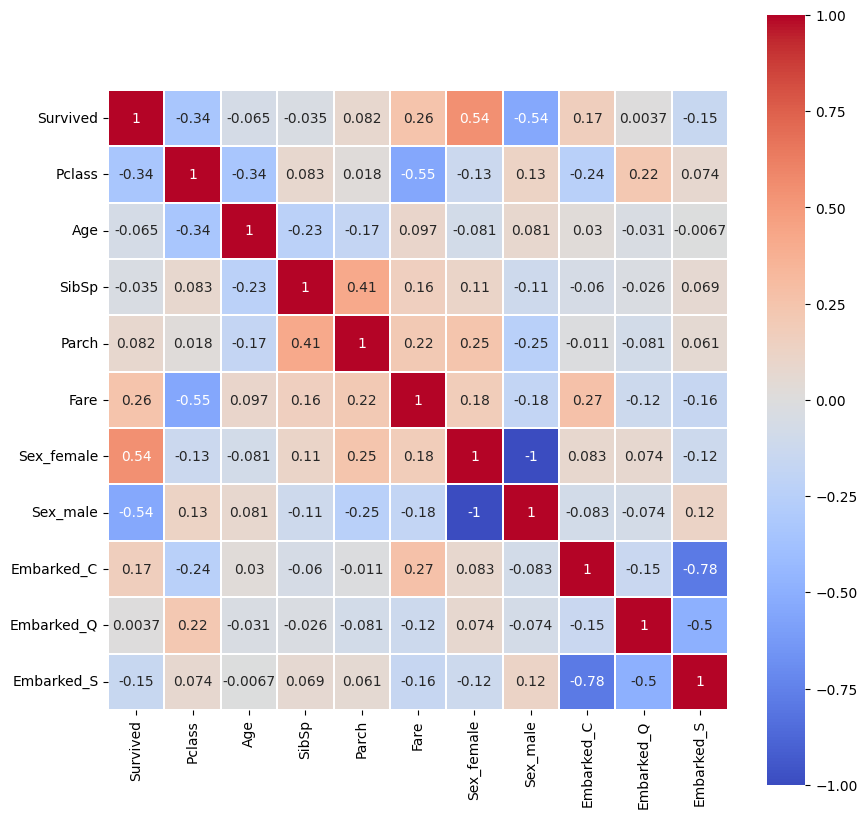

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat_dummies, annot=True, cmap='coolwarm', linewidths=.2, square=True)
plt.show()

In [20]:
le_s = LabelEncoder()
le_e = LabelEncoder()
Embarked_le = pd.DataFrame(le_e.fit_transform(df[['Embarked']]))
Sex_le = pd.DataFrame(le_s.fit_transform(df[['Sex']]))
df_le = df
df_le['Sex'] = Sex_le
df_le['Embarked'] = Embarked_le
df_le.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [21]:
corr_mat_le = df_le.corr()

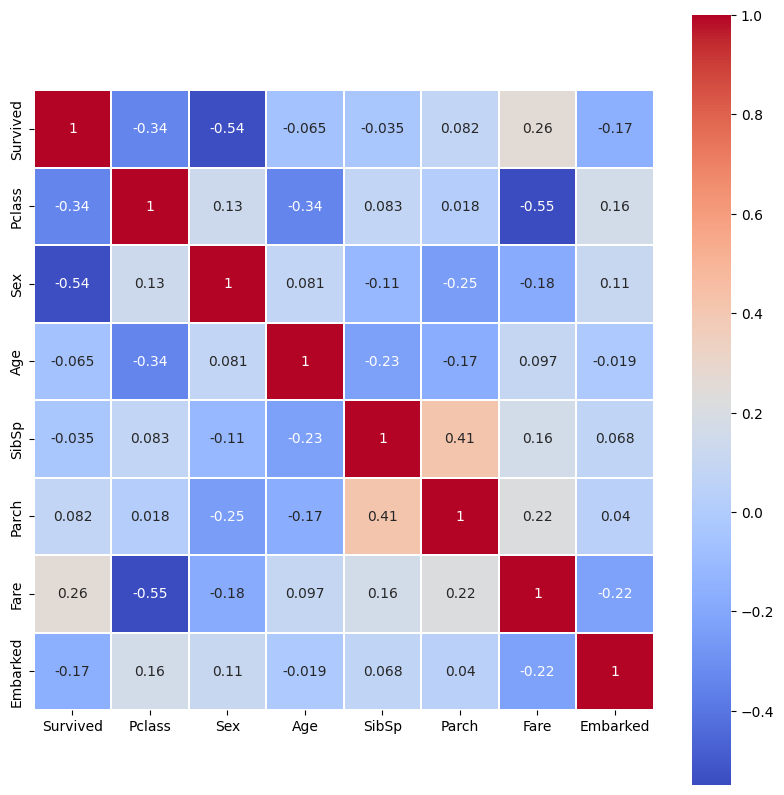

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat_le, annot=True, cmap='coolwarm', linewidths=.2, square=True)
plt.show()

In [23]:
df.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,88
SibSp,7
Parch,7
Fare,248
Embarked,3


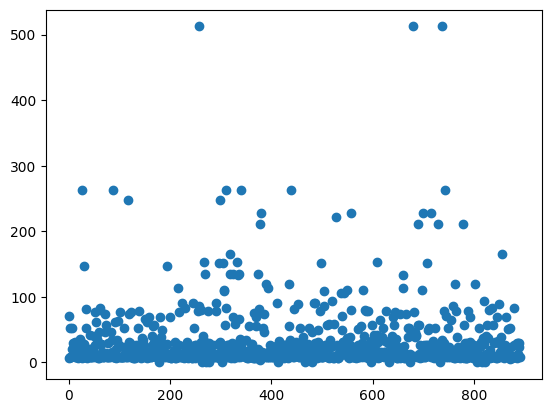

In [24]:
x_axis = np.arange(len(df.Fare))
plt.scatter(x_axis, df.Fare)
plt.show()

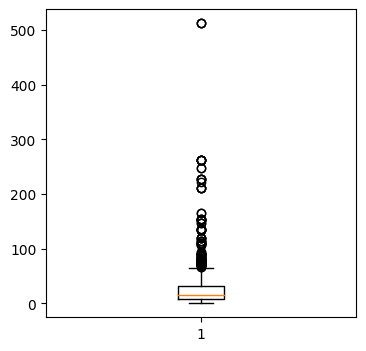

In [25]:
plt.figure(figsize=(4,4))
plt.boxplot(df['Fare'].values)
plt.show()

In [26]:
above_200 = df[df.Fare>200]
len(above_200)/len(df.Fare)*100

2.244668911335578

In [27]:
df['Fare'][df.Fare>200]=df.Fare.mode().values[0]

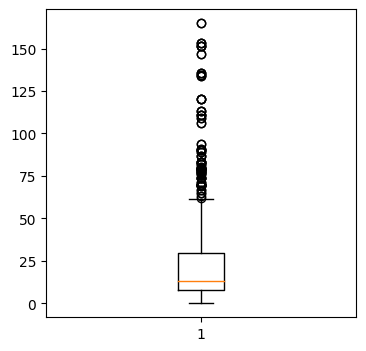

In [28]:
plt.figure(figsize=(4,4))
plt.boxplot(df['Fare'].values)
plt.show()

In [29]:
df.Age.describe()

,Age
count,891.000000
mean,29.361582
std,13.019697
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


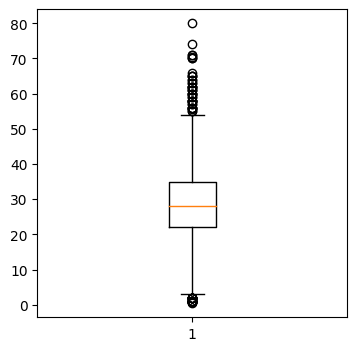

In [30]:
plt.figure(figsize=(4,4))
plt.boxplot(df['Age'].values)
plt.show()

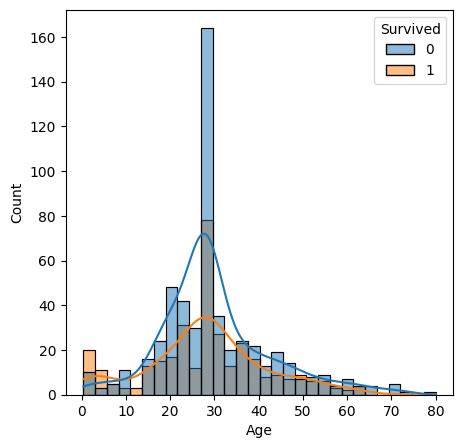

In [31]:
plt.figure(figsize=(5,5))
sns.histplot(data = df_le, x = "Age", kde = True, hue = "Survived" )
plt.show()

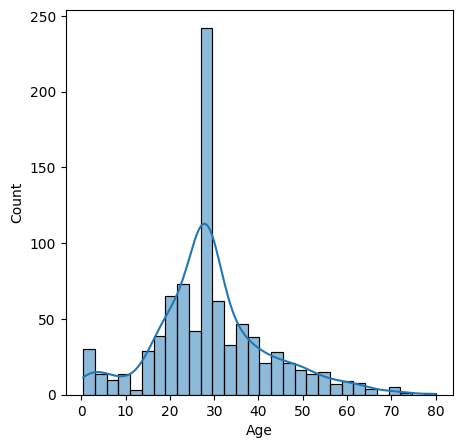

In [32]:
plt.figure(figsize=(5,5))
sns.histplot(data = df_le, x = "Age", kde = True )
plt.show()

In [33]:
scaled_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
df_dummies_st = df_dummies[scaled_columns]

In [34]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(df_dummies_st)
df_dummies[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = standard_df
df_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,1.0,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,1.0,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,1.0,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.0,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


## Train your model (Classification)

In [35]:
pip install --pre pycaret -q

In [36]:
from pycaret.classification import *

In [37]:
setup(data = df_dummies,target = "Survived", session_id = 85, remove_outliers = True)

,Description,Value
0,Session id,85
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 11)"
4,Transformed data shape,"(859, 11)"
5,Transformed train set shape,"(591, 11)"
6,Transformed test set shape,"(268, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [38]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [39]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8331,0.8638,0.7534,0.8085,0.7756,0.6436,0.6490,0.7720
gbc,Gradient Boosting Classifier,0.8250,0.8643,0.7159,0.8126,0.7578,0.6222,0.6285,0.4900
rf,Random Forest Classifier,0.8169,0.8591,0.7408,0.7810,0.7573,0.6109,0.6145,0.3890
lr,Logistic Regression,0.8061,0.8644,0.7409,0.7535,0.7451,0.5890,0.5911,0.9170
xgboost,Extreme Gradient Boosting,0.8058,0.8557,0.7409,0.7590,0.7447,0.5889,0.5941,0.2390
knn,K Neighbors Classifier,0.8010,0.8401,0.7114,0.7586,0.7325,0.5747,0.5771,0.2120
ridge,Ridge Classifier,0.7980,0.8650,0.7201,0.7475,0.7307,0.5697,0.5728,0.2210
lda,Linear Discriminant Analysis,0.7980,0.8646,0.7201,0.7475,0.7307,0.5697,0.5728,0.1940
et,Extra Trees Classifier,0.7929,0.8260,0.7286,0.7349,0.7296,0.5621,0.5644,0.3500
ada,Ada Boost Classifier,0.7882,0.8437,0.6993,0.7405,0.7158,0.5480,0.5518,0.3620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=85, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [40]:
df_dummies.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,1.0,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0


In [41]:
X = df_dummies.drop('Survived', axis=1)
y = df_dummies.Survived

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=.2)

In [43]:
def parameter_finder (model, parameters):

    start = time.time()

    grid = GridSearchCV(model,
                        param_grid = parameters,
                        refit = True,
                        cv = KFold(shuffle = True, random_state = 1),
                        n_jobs = -1)
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)

    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    model_name = str(model).split('(')[0]

    end = time.time()

    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")
    return train_score, test_score, RMSE

In [44]:
lgbm_model = LGBMClassifier(n_jobs = -1)
param_lgbm = {
    'boosting_type': ['gbdt'],
    'num_leaves': [25, 30, 35],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [-1],
    'min_child_weight': [0.001],
    'min_child_samples': [20],
    'subsample': [1.0]
}
lgbm_train_score, lgbm_test_score, lgbm_RMSE = parameter_finder(lgbm_model, param_lgbm)

[LightGBM] [Info] Number of positive: 263, number of negative: 449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 216
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369382 -> initscore=-0.534869
[LightGBM] [Info] Start training from score -0.534869
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [45]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)

gbc_model = GradientBoostingClassifier()
param_gbc = {
    'n_estimators': [100],
    'learning_rate': [0.5, 1.0, 2],
    'max_depth': [1, 2, 5],
    'random_state': [0]
}
gbc_train_score, gbc_test_score, gbc_RMSE = parameter_finder(gbc_model, param_gbc)

The best parameters for GradientBoostingClassifier model is: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100, 'random_state': 0}
--------------------
(R2 score) in the training set is 93.96% for GradientBoostingClassifier model.
(R2 score) in the testing set is 77.09% for GradientBoostingClassifier model.
RMSE is 0.478591975830779 for GradientBoostingClassifier model.
--------------------
Runtime of the program is: 6.40


In [46]:
rfc_model = RandomForestClassifier()
param_rfc = {
    'n_estimators' : [100, 130],
    'max_depth' : [2, 5, 7]
}
rfc_train_score, rfc_test_score, rfc_RMSE = parameter_finder(rfc_model, param_rfc)

The best parameters for RandomForestClassifier model is: {'max_depth': 5, 'n_estimators': 130}
--------------------
(R2 score) in the training set is 86.10% for RandomForestClassifier model.
(R2 score) in the testing set is 78.77% for RandomForestClassifier model.
RMSE is 0.46074993520704494 for RandomForestClassifier model.
--------------------
Runtime of the program is: 6.76


In [47]:
lr_model = LogisticRegression()
param_lr = {}
lr_train_score, lr_test_score, lr_RMSE = parameter_finder(lr_model, param_lr)

The best parameters for LogisticRegression model is: {}
--------------------
(R2 score) in the training set is 81.18% for LogisticRegression model.
(R2 score) in the testing set is 78.77% for LogisticRegression model.
RMSE is 0.46074993520704494 for LogisticRegression model.
--------------------
Runtime of the program is: 0.14


In [48]:
xgb_model = XGBClassifier(n_jobs = -1)
param_xgb = {

    'n_estimators': [100,300],
    'learning_rate': [0.1,0.05],
    'subsample': [0.75],
    'colsample_bytree': [1],
    'max_depth': [3,4,5],
    'gamma': [0]}

xgb_train_score, xgb_test_score, xgb_RMSE = parameter_finder(xgb_model, param_xgb)



The best parameters for XGBClassifier model is: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.75}
--------------------
(R2 score) in the training set is 89.47% for XGBClassifier model.
(R2 score) in the testing set is 78.77% for XGBClassifier model.
RMSE is 0.46074993520704494 for XGBClassifier model.
--------------------
Runtime of the program is: 5.05


In [49]:
ridge = RidgeClassifier(random_state = 1) # Linear least squares with l2 regularization.
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, param_ridge)


The best parameters for RidgeClassifier model is: {'alpha': 10}
--------------------
(R2 score) in the training set is 81.18% for RidgeClassifier model.
(R2 score) in the testing set is 75.42% for RidgeClassifier model.
RMSE is 0.49579235156053164 for RidgeClassifier model.
--------------------
Runtime of the program is: 0.21


In [50]:
svm_model = SVC()
param_svm = {
    'kernel': ['rbf', 'linear'],
    'gamma' : [0.5],
    'C' : [1.0]
}
svm_train_score, svm_test_score, svm_RMSE = parameter_finder(svm_model, param_svm)


The best parameters for SVC model is: {'C': 1.0, 'gamma': 0.5, 'kernel': 'rbf'}
--------------------
(R2 score) in the training set is 87.08% for SVC model.
(R2 score) in the testing set is 77.09% for SVC model.
RMSE is 0.478591975830779 for SVC model.
--------------------
Runtime of the program is: 0.27


In [51]:
dtc = DecisionTreeClassifier(random_state=1)

param_dtc = {'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
             }

dtc_train_score, dtc_test_score, dtc_RMSE = parameter_finder(dtc, param_dtc)

The best parameters for DecisionTreeClassifier model is: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
--------------------
(R2 score) in the training set is 83.43% for DecisionTreeClassifier model.
(R2 score) in the testing set is 79.89% for DecisionTreeClassifier model.
RMSE is 0.4484610556511615 for DecisionTreeClassifier model.
--------------------
Runtime of the program is: 50.05


In [52]:
knc = KNeighborsClassifier()

param_knc = {'n_neighbors': [2, 5, 10, 15, 20],
            'weights': ['uniform', 'distance']}

knc_train_score, knc_test_score, knc_RMSE = parameter_finder(knc, param_knc)

The best parameters for KNeighborsClassifier model is: {'n_neighbors': 20, 'weights': 'uniform'}
--------------------
(R2 score) in the training set is 83.57% for KNeighborsClassifier model.
(R2 score) in the testing set is 74.86% for KNeighborsClassifier model.
RMSE is 0.5013947028486567 for KNeighborsClassifier model.
--------------------
Runtime of the program is: 0.70


## Test Result

In [70]:
models_score = pd.DataFrame({'Training score': [lgbm_train_score, gbc_train_score, rfc_train_score, lr_train_score, xgb_train_score, ridge_train_score, svm_train_score, dtc_train_score,knc_train_score],
                             'Testing score': [lgbm_test_score, gbc_test_score, rfc_test_score, lr_test_score, xgb_test_score, ridge_test_score, svm_test_score, dtc_test_score,knc_test_score],
                             'RMSE': [lgbm_RMSE, gbc_RMSE, rfc_RMSE, lr_RMSE, xgb_RMSE, ridge_RMSE, svm_RMSE, dtc_RMSE, knc_RMSE]},
                             index = ['LightGBM','GradientBoostingClassifier','RandomForestClassifier','LogisticRegression', 'XGBoost', 'Ridge','SVMClassifier','DecisionTreeClassifier','KNeighborsClassifier'])

models_score

,Training score,Testing score,RMSE
LightGBM,0.922753,0.804469,0.442189
GradientBoostingClassifier,0.939607,0.770950,0.478592
RandomForestClassifier,0.860955,0.787709,0.460750
LogisticRegression,0.811798,0.787709,0.460750
XGBoost,0.894663,0.787709,0.460750
Ridge,0.811798,0.754190,0.495792
SVMClassifier,0.870787,0.770950,0.478592
DecisionTreeClassifier,0.834270,0.798883,0.448461
KNeighborsClassifier,0.835674,0.748603,0.501395


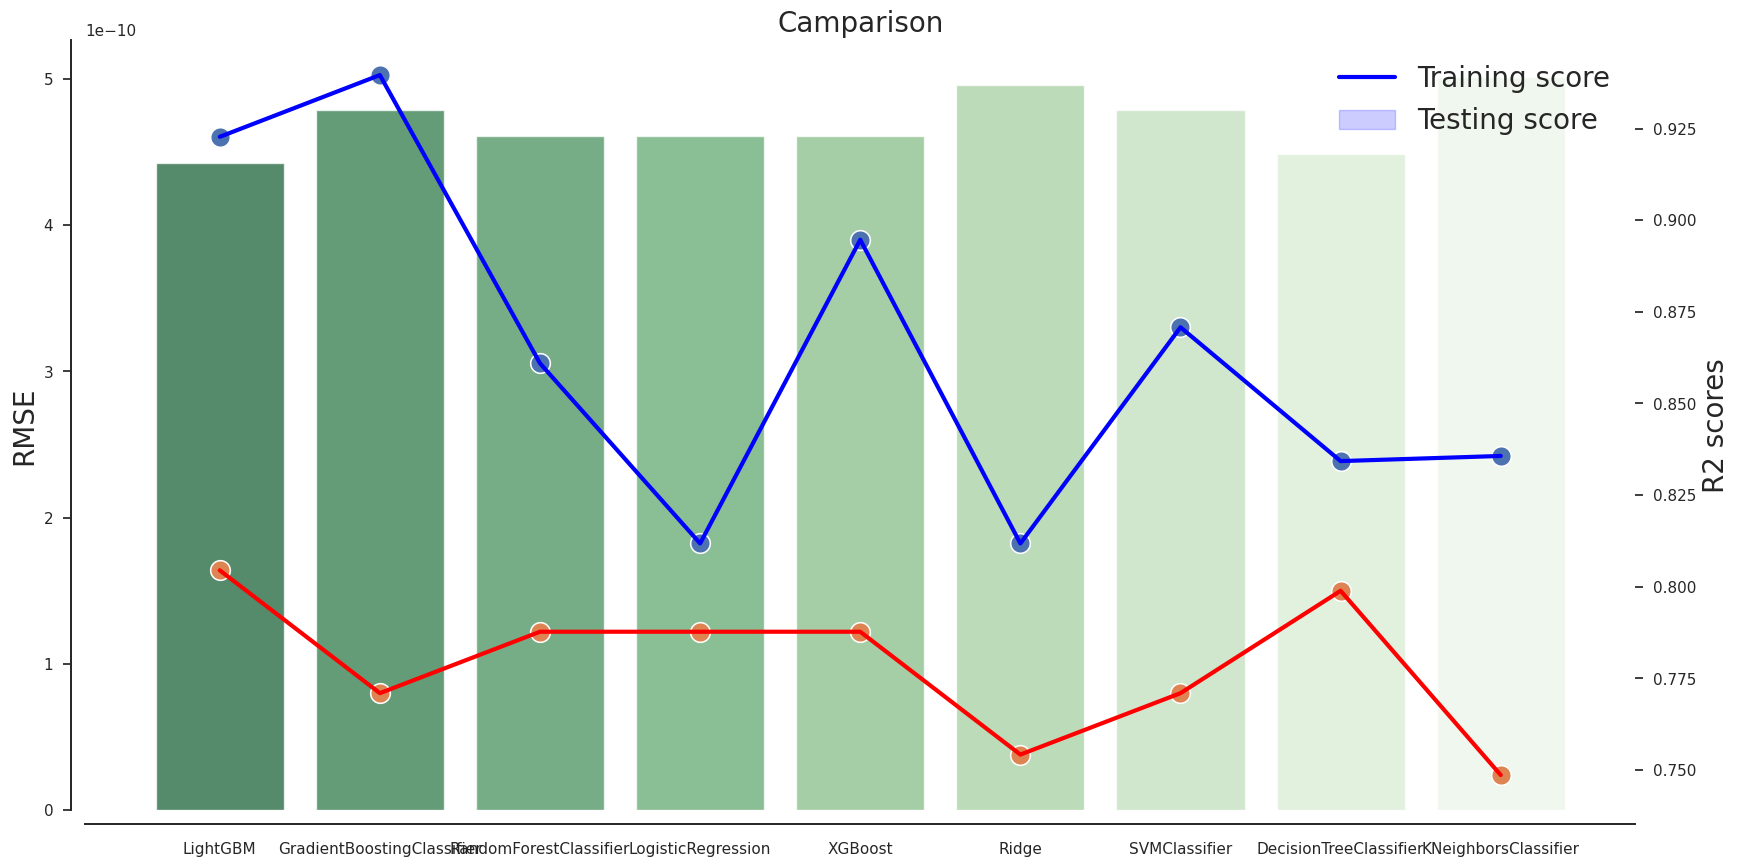

In [71]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set(style='white')

ax.set_title("Camparison", fontsize = 20)

ax = sns.barplot(x = list(models_score.index), y = models_score['RMSE']/1000000000, alpha = 0.7, palette='Greens_r')

ax.set_ylabel("RMSE", fontsize = 20)

sec_ax = ax.twinx()

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Training score'], linewidth = 3, color = 'blue')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Training score'], s = 200)

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Testing score'], linewidth = 3, color = 'red')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Testing score'], s = 200)

sec_ax.set_ylabel("R2 scores", fontsize = 20)

sec_ax.legend(labels = ['Training score', 'Testing score'], fontsize = 20)


sns.despine(offset = 10)

plt.show()

## **`Applying final model`**

In [55]:
df_test = pd.read_csv('test.csv')

In [56]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
df_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,1.0,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,1.0,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,1.0,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.0,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [58]:
df_test_mod = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df_test_mod.sample()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
19,3,female,45.0,0,0,7.225,C


In [59]:
df_test_mod.nunique()

,0
Pclass,3
Sex,2
Age,79
SibSp,7
Parch,8
Fare,169
Embarked,3


In [60]:
print(df_test_mod.shape)
df_test_mod.isnull().sum()

(418, 7)


,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [61]:
df_test_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [62]:
df_test_mod['Age'].fillna(df_test_mod['Age'].median(), inplace=True)
df_test_mod['Fare'].fillna(df_test_mod.Fare.mode().values[0], inplace=True)

In [63]:
df_test_mod.Fare = df_test_mod.Fare.astype(float)

In [64]:
df_test_mod.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [65]:
numeric_features = ["Age", "Fare", "Pclass"]
numeric_transformer = Pipeline(
    steps=[("scaler", scaler)]
)

categorical_features = ["Embarked", "Sex"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [67]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", dtc)]
)

clf.fit(df.drop('Survived', axis=1), df.Survived)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['Age', 'Fare', 'Pclass']),
                                                 ('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('encoder',
                                                                   OneHotEncod...
                                                  ['Embarked', 'Sex'])],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, random_state=1,
                                        splitter='best'))],
         verbose=False)

In [68]:
y_pred = clf.predict(df_test)
y_pred = pd.DataFrame(y_pred, columns=['Survived'])
y_pred.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [69]:
final_result = pd.concat([df_test.PassengerId, pd.DataFrame(y_pred)], axis =1)
final_result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [73]:
final_result.Survived.value_counts()

,count
Survived,
1,307
0,111


## Send us the Result (Maktabkhoone)